In [1]:
import os
import random

from ocr.helpers.plot import *
from ocr.ocr import OCR

In [2]:
ocr_model = OCR()

In [3]:
import pdf2image
def pdf_2_img(file_path, output):
    """
    Hàm convert file pdf thành file jpg. (chỉ lấy trang đầu tiên)
    :param
        - file: tên file
        - dir: thư mục gốc của file
        - output_dir: thư mục lưu file
    """
    imgs = pdf2image.convert_from_path(file_path, first_page = 1)
    imgs[0].save(output)

    return output


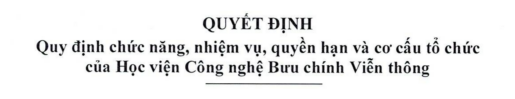

QUYÉẾT ĐỊNH
Quy định chức năng, nhiệm vụ, quyền hạn và cơ cầu tổ chức
của Học viện Công nghệ Bưu chính Viên thông



['QUYÉẾT ĐỊNH\nQuy định chức năng, nhiệm vụ, quyền hạn và cơ cầu tổ chức\ncủa Học viện Công nghệ Bưu chính Viên thông\n']

In [4]:
output1 = pdf_2_img('./test.PDF', "./test.png")
ocr_model.forward("./test.png")

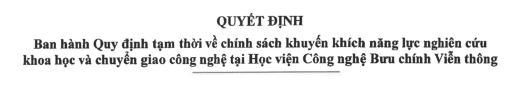

QUYÉẾT ĐỊNH

Ban hành Quy định tạm thời về chính sách khuyến khích năng lực nghiên cứu
khoa học và chuyễn giao công nghệ tại Học viện Công nghệ Bưu chính Viễn thông




['QUYÉẾT ĐỊNH\n\nBan hành Quy định tạm thời về chính sách khuyến khích năng lực nghiên cứu\nkhoa học và chuyễn giao công nghệ tại Học viện Công nghệ Bưu chính Viễn thông\n\n']

In [5]:
output1 = pdf_2_img('./test2.pdf', "./test2.png")
ocr_model.forward("./test2.png")

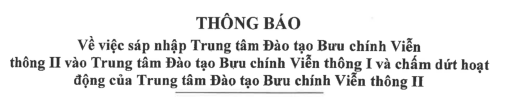

THÔNG BÁO
Về việc sáp nhập Trung tâm Đào tạo Bưu chính Viễn
thông II vào h-ung tâm Đào tạo Bựu chính Viễn thông I và chấm dứt hoạt
động của Trung tâm Đào tạo Bưu chính Viễn thông H



['THÔNG BÁO\nVề việc sáp nhập Trung tâm Đào tạo Bưu chính Viễn\nthông II vào h-ung tâm Đào tạo Bựu chính Viễn thông I và chấm dứt hoạt\nđộng của Trung tâm Đào tạo Bưu chính Viễn thông H\n']

In [6]:
output1 = pdf_2_img('./test3.pdf', "./test3.png")
ocr_model.forward("./test3.png")

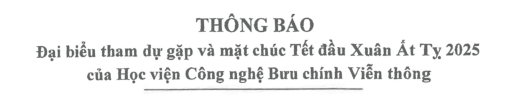

THÔNG BÁO
Đại biểu tham dự gặp và mặt chúc Tết đầu Xuân Át Ty 2025
của Học viện Công nghệ Bưu chính Viễn thông



['THÔNG BÁO\nĐại biểu tham dự gặp và mặt chúc Tết đầu Xuân Át Ty 2025\ncủa Học viện Công nghệ Bưu chính Viễn thông\n']

In [7]:
output1 = pdf_2_img('./test4.pdf', "./test4.png")
ocr_model.forward("./test4.png")

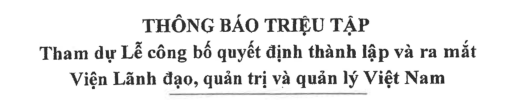

THÔNG BÁO TRIỆU TẬP
Tham dự Lễ công bố quyết định thành lập và ra mắt
Viện Lãnh đạo, quần trị và quản lý Việt Nam




['THÔNG BÁO TRIỆU TẬP\nTham dự Lễ công bố quyết định thành lập và ra mắt\nViện Lãnh đạo, quần trị và quản lý Việt Nam\n\n']

In [8]:
output1 = pdf_2_img('./test5.pdf', "./test5.png")
ocr_model.forward("./test5.png")

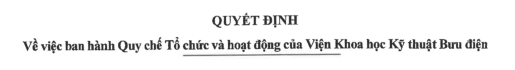

QUYÉẾT ĐỊNH
Về việc ban hành Quy chế Tổ chức và hoạt động của Viện Khoa học Kỹ thuật Bưu điện



['QUYÉẾT ĐỊNH\nVề việc ban hành Quy chế Tổ chức và hoạt động của Viện Khoa học Kỹ thuật Bưu điện\n']

In [9]:
output1 = pdf_2_img('./test6.pdf', "./test6.png")
ocr_model.forward("./test6.png")

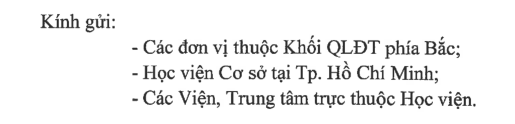

Kính gửi:
- Các đơn vị thuộc Khối QLĐT phía Bắc;
- Học viện Cơ sở tại Tp. Hồ Chí Minh;
- Các Viện, Trung tâm trực thuộc Học viện.



['Kính gửi:\n- Các đơn vị thuộc Khối QLĐT phía Bắc;\n- Học viện Cơ sở tại Tp. Hồ Chí Minh;\n- Các Viện, Trung tâm trực thuộc Học viện.\n']

In [10]:
output1 = pdf_2_img('./test7.pdf', "./test7.png")
ocr_model.forward("./test7.png")

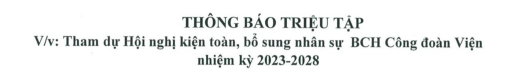

THÔNG BÁO TRIỆU TẬP
V/y: Tham dự Hội nghị kiện toàn, bổ sung nhân sự BCH Công đoàn Viện
nhiệm kỳ 2023-2028



['THÔNG BÁO TRIỆU TẬP\nV/y: Tham dự Hội nghị kiện toàn, bổ sung nhân sự BCH Công đoàn Viện\nnhiệm kỳ 2023-2028\n']

In [ ]:
output1 = pdf_2_img('./test8.pdf', "./test8.png")
ocr_model.forward("./test8.png")

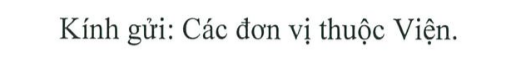

Kính gửi: Các đơn vị thuộc Viện.



['Kính gửi: Các đơn vị thuộc Viện.\n']

In [12]:
output1 = pdf_2_img('./test9.pdf', "./test9.png")
ocr_model.forward("./test9.png")